 ### Prediction using Unsupervised ML

Author: **Valmiki Ganesh Deepak**


Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. Link for the raw dataset: https://bit.ly/3kXTdox

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [3]:
raw_data = pd.read_csv('Iris.csv')
raw_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#checking any missing data

raw_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
raw_data = raw_data.copy()

In [7]:
print('No. of observations: {}\nNo. of variables: {}'.format(raw_data.shape[0],raw_data.shape[1]-2))

No. of observations: 150
No. of variables: 4


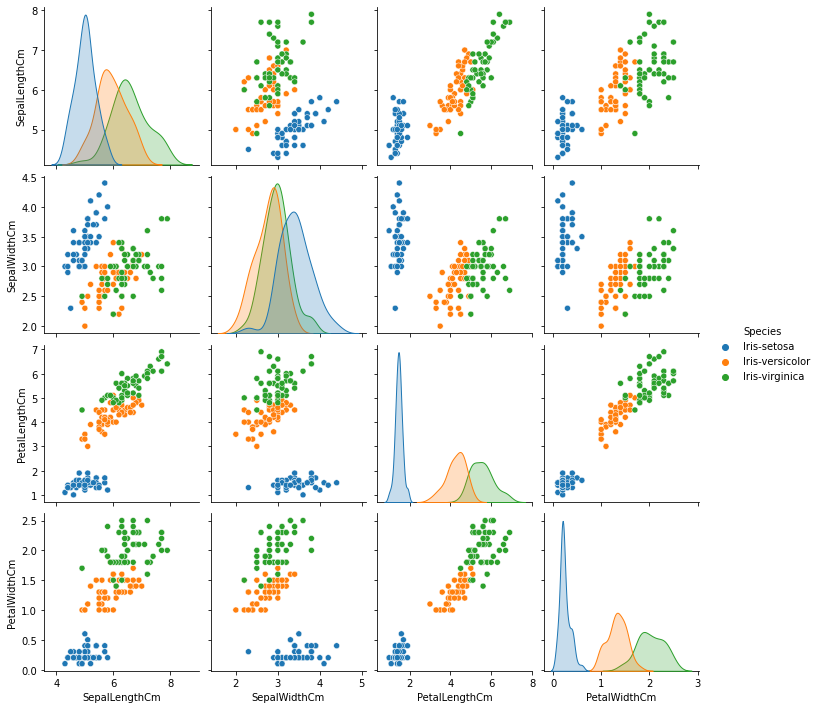

In [8]:
sns.pairplot(raw_data.drop('Id',axis=1),hue='Species');
#visualization of the data set 

In [9]:
data = raw_data.iloc[:,[ 1,2,3,4]].values

In [10]:
#within cluster sum of squares 
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit(data)
  wcss.append(km.inertia_)

C:\Users\vgane\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


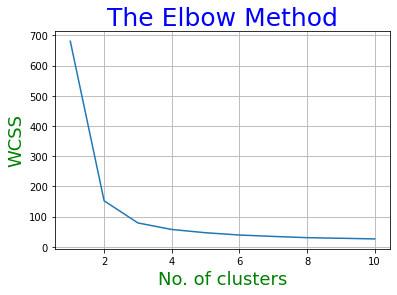

In [11]:
#Applying the ELBOW method to find the optimum clusters

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',color='blue',fontsize= 25);
plt.xlabel('No. of clusters', color= 'green', fontsize=18)
plt.ylabel('WCSS', color= 'green', fontsize = 18)
plt.grid()
plt.show()

From this graph, we can assume that the optimal clusters are 3.

In [12]:
# Applying kmeans to the dataset for 3 clusters
km = KMeans(n_clusters=3, random_state=0)
y_pred = km.fit_predict(data)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

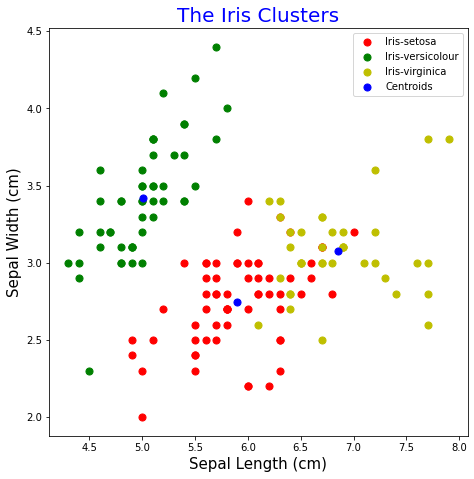

In [13]:
# Plotting the clusters along with their centroids

plt.figure(figsize= (7.5,7.5))
plt.scatter(data[y_pred == 0,0],data[y_pred == 0,1],s=50, c='r',label='Iris-setosa')
plt.scatter(data[y_pred == 1,0],data[y_pred == 1,1],s=50, c='g',label='Iris-versicolour')
plt.scatter(data[y_pred == 2,0],data[y_pred == 2,1],s=50, c='y',label='Iris-virginica')
plt.title('The Iris Clusters', fontsize = 20, c= 'b')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50, c= 'blue', label = 'Centroids')
plt.legend()
plt.xlabel('Sepal Length (cm)', fontsize= 15)
plt.ylabel('Sepal Width (cm)', fontsize= 15);

##Principal component reduction 
This method is used to apply dimensionality reduction to the datasets having more variables and difficult to show the clustering on a 2D graph.

Here in this case, Iris dataset, the no. of variables which decides the species are **4**(sepalwidth, sepallength, petallength, petalwidth). So, here we transform them into **2** principal components(PCA1 AND PCA2) and plot them.

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data)

principal_comp[:10,:]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ]])

In [15]:
pca_df = pd.DataFrame(data = principal_comp, columns =['PCA1','PCA2'])
pca_df.head()

,PCA1,PCA2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [16]:
labels = km.labels_
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)


pca_df

,PCA1,PCA2,cluster
0,-2.684207,0.326607,1
1,-2.715391,-0.169557,1
2,-2.889820,-0.137346,1
3,-2.746437,-0.311124,1
4,-2.728593,0.333925,1
...,...,...,...
145,1.944017,0.187415,2
146,1.525664,-0.375021,0
147,1.764046,0.078519,2
148,1.901629,0.115877,2


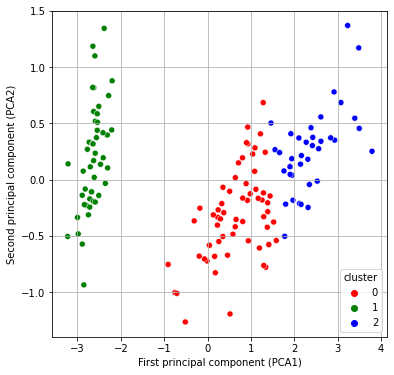

In [17]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot( x="PCA1", y="PCA2", hue = "cluster", data = pca_df, palette =['r','g','b'])
plt.grid()
plt.xlabel('First principal component (PCA1)')
plt.ylabel('Second principal component (PCA2)')
plt.show()